<a href="https://colab.research.google.com/github/mikulr/deep_learning/blob/main/AlphabetSoupCharity_Optimzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RE- Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the charity_data.csv.
url= "https://raw.githubusercontent.com/mikulr/deep_learning/main/Resources/charity_data.csv"
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [ ]:
application_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [ ]:
application_df.duplicated().sum()

0

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME' 
# Additionally drop STATUS
application_df=application_df.drop(columns={'EIN','NAME', 'STATUS'})

In [ ]:
# Determine the number of unique values in each column.
counts = application_df.nunique()
counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
# confirm no negative numbers in the ASK_AMT column
(application_df['ASK_AMT'] < 0).any()

False

In [ ]:
application_df['ASK_AMT'].value_counts()


5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f47cefabcd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f47cefb1d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f47cefb6d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f47cefb6810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f47cefb1290>,
  <matplotlib.lines.Line2D at 0x7f47cefb17d0>]}

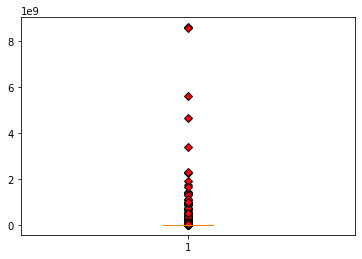

In [ ]:
#check for outliers in ask amount
ask= application_df['ASK_AMT']
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(ask, flierprops=red_diamond)

In [ ]:
application_df.loc[application_df['ASK_AMT'] > 5000, 'FUND TYPE'] = 'LARGE' 
application_df.loc[application_df['ASK_AMT'] <= 5000, 'FUND TYPE'] = 'SMALL' 

In [ ]:
application_df=application_df.drop(columns='ASK_AMT')

In [ ]:
# Create Filter for outliers in the ASK_AMT column (may be applied later)
# q = application_df['ASK_AMT'].quantile(0.95)

In [ ]:
income= application_df['INCOME_AMT'].value_counts()
income

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [ ]:
# With over 70% of these as one type of zero, try to classify as known or unknown income
application_df.loc[application_df['INCOME_AMT'] != 0, 'KNOWN_INCOME'] = 'True' 
application_df.loc[application_df['INCOME_AMT'] == '0', 'KNOWN_INCOME'] = 'False' 

In [ ]:
application_df=application_df.drop(columns="INCOME_AMT")

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
app_count= application_df['APPLICATION_TYPE'].value_counts()
# Again, almost 80% in one bucket
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_count[app_count <1550].index)
# application_types_to_replace

In [ ]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
class_count= application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count2=application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
# class_count2

In [ ]:
classifications_to_replace = list(class_count[class_count < 2000].index)
# classifications_to_replace

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [ ]:
recounts = application_df.nunique()
recounts

APPLICATION_TYPE          2
AFFILIATION               6
CLASSIFICATION            4
USE_CASE                  5
ORGANIZATION              4
SPECIAL_CONSIDERATIONS    2
IS_SUCCESSFUL             2
FUND TYPE                 2
KNOWN_INCOME              2
dtype: int64

In [ ]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,FUND TYPE,KNOWN_INCOME
0,Other,Independent,C1000,ProductDev,Association,N,1,SMALL,False
1,T3,Independent,C2000,Preservation,Co-operative,N,1,LARGE,True
2,Other,CompanySponsored,Other,ProductDev,Association,N,0,SMALL,False
3,T3,CompanySponsored,C2000,Preservation,Trust,N,1,LARGE,True
4,T3,Independent,C1000,Heathcare,Trust,N,1,LARGE,True


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummies= pd.get_dummies(application_df)
app_dummies

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,FUND TYPE_LARGE,FUND TYPE_SMALL,KNOWN_INCOME_False,KNOWN_INCOME_True
0,1,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
1,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
4,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
34295,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
34296,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
34297,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = app_dummies.drop(["IS_SUCCESSFUL"], axis="columns")
y = app_dummies["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

Same as in other notebook but with data re-processed

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=27))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="tanh"))


# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                280       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=25)

Epoch 1/25
804/804 [==============================] - 2s 1ms/step - loss: 0.6050 - accuracy: 0.6832
Epoch 2/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5886 - accuracy: 0.6963
Epoch 3/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5866 - accuracy: 0.7004
Epoch 4/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5851 - accuracy: 0.7021
Epoch 5/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5839 - accuracy: 0.7039
Epoch 6/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5833 - accuracy: 0.7051
Epoch 7/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5832 - accuracy: 0.7034
Epoch 8/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5829 - accuracy: 0.7042
Epoch 9/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5827 - accuracy: 0.7054
Epoch 10/25
804/804 [==============================] - 1s 1ms/step - loss: 0.5826 - accuracy: 0.7056

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5830 - accuracy: 0.7058 - 323ms/epoch - 1ms/step
Loss: 0.5829512476921082, Accuracy: 0.7057725787162781


The Accuracy actually got worse on the trimmed down data. I assume the same will happen when running the Tuner as well. 

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=21,
        max_value=31,
        step=5), activation=activation, input_dim=27))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=10,
            max_value=31,
            step=5),
            activation=activation))
    
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn


In [ ]:
pip install keras_tuner

     |████████████████████████████████| 133 kB 13.2 MB/s 


In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=15,
    hyperband_iterations=2, 
    overwrite=True)

In [ ]:
tuner.search(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 41s]
val_accuracy: 0.7060058116912842

Best val_accuracy So Far: 0.7071720361709595
Total elapsed time: 00h 11m 37s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hyper = tuner.get_best_hyperparameters()[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 21,
 'num_layers': 7,
 'tuner/bracket': 2,
 'tuner/epochs': 15,
 'tuner/initial_epoch': 5,
 'tuner/round': 2,
 'tuner/trial_id': '0043',
 'units_0': 25,
 'units_1': 25,
 'units_10': 25,
 'units_11': 20,
 'units_12': 25,
 'units_13': 25,
 'units_14': 30,
 'units_2': 25,
 'units_3': 25,
 'units_4': 25,
 'units_5': 20,
 'units_6': 25,
 'units_7': 25,
 'units_8': 15,
 'units_9': 30}

In [ ]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE